In [1]:
import sys, os 
import numpy as np 
import pandas as pd
from src import utils, plots
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import rcParams
default_font = 12
fs_title = 16
rcParams["font.family"] = "Arial"
rcParams["savefig.dpi"] = 300
rcParams["axes.spines.top"] = False
rcParams["axes.spines.right"] = False
rcParams["axes.titlelocation"] = "left"
rcParams["axes.titleweight"] = "normal"
rcParams["font.size"] = default_font
trial_type_palette = ['tab:green', 'tab:red', 'tab:cyan', 'tab:orange', 'grey'] #rew #nrew #rew_test #nrew_test #GI

In [20]:
VG11 = []
VG11.append({'mname': 'VG11', 'datexp': '2024_10_31', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_14', 'blk':'2'})
VG14 = []
VG14.append({'mname': 'VG14', 'datexp': '2024_11_21', 'blk':'2'})
VG15 = []
VG15.append({'mname': 'VG15', 'datexp': '2024_10_31', 'blk':'2'})
behav_sess = VG11 + VG14 + VG15

In [30]:
def plot_red_intensity(main_root, mname, datexp, blk):
    behav_path = os.path.join(main_root, mname, datexp, blk, 'suite2p')
    # number of planes (directories) in the suite2p folder
    n_planes = len([name for name in os.listdir(behav_path) if os.path.isdir(os.path.join(behav_path, name))])
    fig, ax = plt.subplots(1, n_planes, figsize=(40, 2), sharey=True)
    for plane in range(n_planes):
        p = f"plane{plane}"
        plane_path = os.path.join(behav_path, p)
        ops = np.load(os.path.join(plane_path, 'ops.npy'), allow_pickle=True).item()
        iscell = np.load(os.path.join(plane_path, 'iscell.npy'), allow_pickle=True)
        redcell = np.load(os.path.join(plane_path, 'redcell.npy'), allow_pickle=True)
        stat = np.load(os.path.join(plane_path, 'stat.npy'), allow_pickle=True)
        nn = redcell.shape[0]
        red_intensity = np.empty((nn))
        meanimage = ops['meanImg_chan2']
        for n in range(0,nn):
            ypix = stat[n]['ypix'][~stat[n]['overlap']]
            xpix = stat[n]['xpix'][~stat[n]['overlap']]
            red_intensity[n] = meanimage[ypix,xpix].mean()
        red_cells = (iscell[:,0] == 1) & (redcell[:,0] == 1)
        rest_cells = (iscell[:,0] == 1) & (redcell[:,0] == 0)
        ax[plane].hist(red_intensity[red_cells], bins=50, alpha=0.5, label='inhibitory cells', color='tab:red', density=True);
        ax[plane].hist(red_intensity[rest_cells], bins=50, alpha=0.5, label='excitatory cells', color='tab:blue', density=True);
        ax[plane].set_title("plane %d" % (plane))
        ax[plane].set_xlabel("mean red intensity")
    ax[-1].text(0.7, 0.9, f"Inhibitory", ha='center', va='center', transform=ax[-1].transAxes, fontsize=default_font, c='tab:red')
    ax[-1].text(0.7, 0.8, f"Excitatory", ha='center', va='center', transform=ax[-1].transAxes, fontsize=default_font, c='tab:blue')
    ax[0].set_ylabel("Density")

C:\Users\labadmin\AppData\Local\Temp\ipykernel_25288\530060676.py:19: RuntimeWarning: Mean of empty slice.
  red_intensity[n] = meanimage[ypix,xpix].mean()


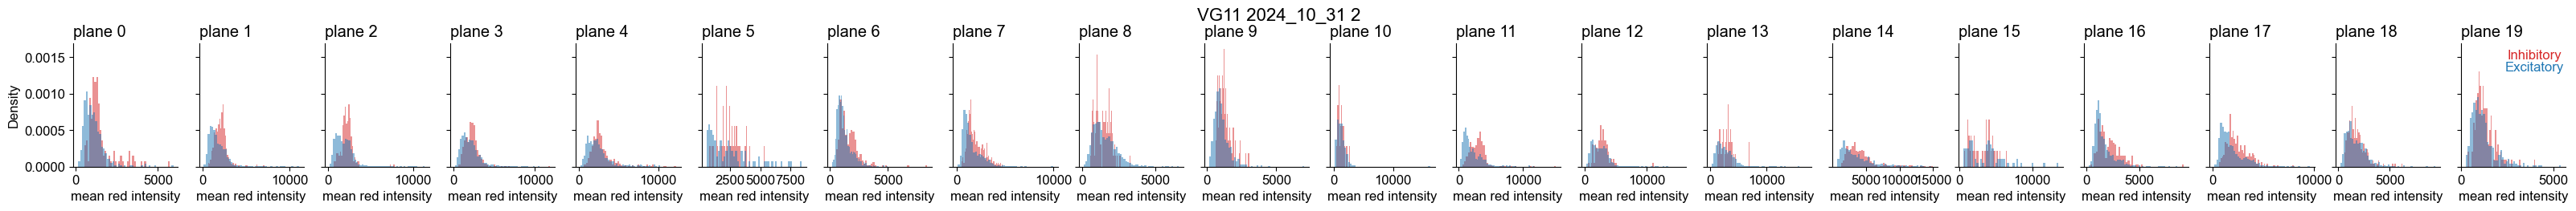

In [31]:
main_root = r"Z:\data\PROC"
mname = 'VG11'
datexp = '2024_10_31'
blk = '2'
plot_red_intensity(main_root, mname, datexp, blk)
plt.suptitle(f"{mname} {datexp} {blk}", fontsize=fs_title, y=1.10)
plt.show()

# lets look at the spike avg per neuron and their variance

In [33]:
m = utils.load_mouse(mname, datexp, blk, load_neurons=True, interp_behav=True, load_retinotopy=True, mdl_path=r"D:\mouseobj\notz")

Checking if model object exists ...
Loading mouse object from D:\mouseobj\notz\VG14\2024_11_21\2
Existing mouse object has the following attributes:
dict_keys(['name', 'datexp', 'blk', 'data_path', '_timeline', '_data_var', '_settings', '_timestamps', '_trial_info', '_spks', '_ypos', '_xpos', '_iplane', '_stat', '_ops', '_snr', 'xy_t', 'iarea', 'iregion', 'outline', 'frameselector', 'isred', 'interp_spks', 'trial_dict', 'train_dp'])


Text(0.5, 0, 'variance spk rate')

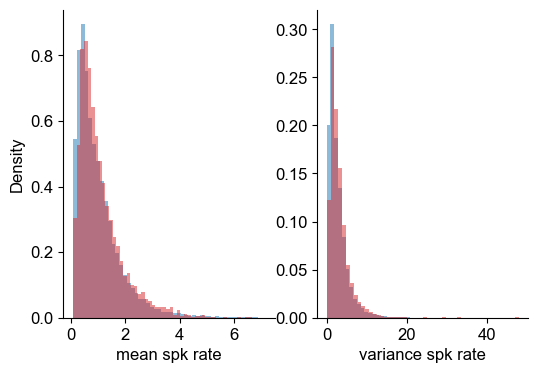

In [41]:
nn = m.interp_spks.shape[0]
mean = m.interp_spks.reshape(nn, -1).mean(axis=1)
var = m.interp_spks.reshape(nn, -1).var(axis=1)
plt.figure(figsize=(6, 4))
ex = np.logical_not(m.isred[:,0]).astype(bool)
inh = m.isred[:,0].astype(bool)
plt.subplot(121)
plt.hist(mean[ex], bins=50, alpha=0.5, label='excitatory cells', color='tab:blue', density=True);
plt.hist(mean[inh], bins=50, alpha=0.5, label='inhibitory cells', color='tab:red', density=True);
plt.xlabel("mean spk rate")
plt.ylabel("Density")
plt.subplot(122)
plt.hist(var[ex], bins=50, alpha=0.5, label='excitatory cells', color='tab:blue', density=True);
plt.hist(var[inh], bins=50, alpha=0.5, label='inhibitory cells', color='tab:red', density=True);
plt.xlabel("variance spk rate")

C:\Users\labadmin\AppData\Local\Temp\ipykernel_25288\530060676.py:19: RuntimeWarning: Mean of empty slice.
  red_intensity[n] = meanimage[ypix,xpix].mean()


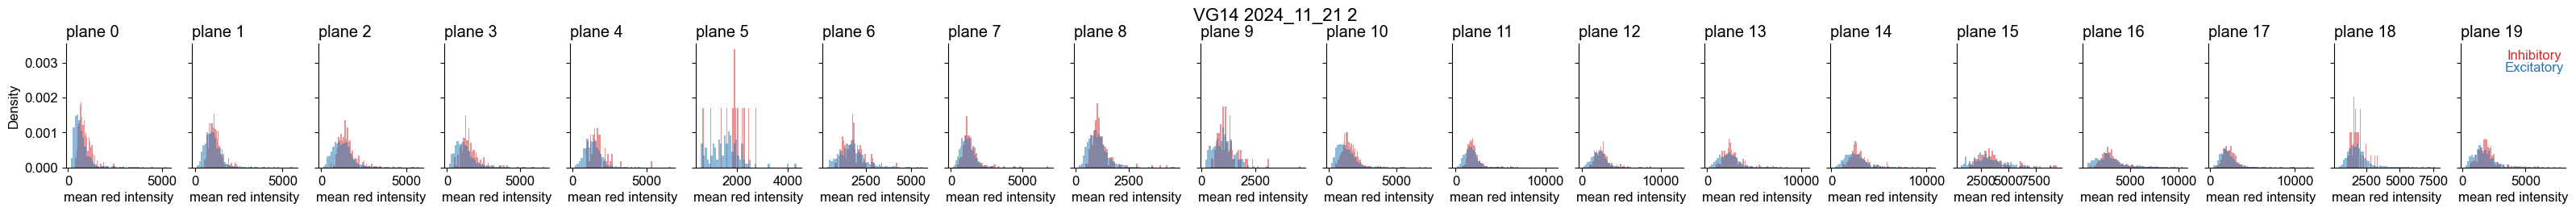

In [32]:
mname = 'VG14'
datexp = '2024_11_21'
blk = '2'
plot_red_intensity(main_root, mname, datexp, blk)
plt.suptitle(f"{mname} {datexp} {blk}", fontsize=fs_title, y=1.10)
plt.show()